<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Found-proteins-with-canonical-motifs" data-toc-modified-id="Found-proteins-with-canonical-motifs-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Found proteins with canonical motifs</a></span><ul class="toc-item"><li><span><a href="#Known-identified-with-canonical-motif" data-toc-modified-id="Known-identified-with-canonical-motif-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Known identified with canonical motif</a></span></li><li><span><a href="#Novel-identified-with-canonical-motif" data-toc-modified-id="Novel-identified-with-canonical-motif-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Novel identified with canonical motif</a></span></li></ul></li><li><span><a href="#Found-proteins-with-new-C-terminal-motifs" data-toc-modified-id="Found-proteins-with-new-C-terminal-motifs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Found proteins with new C-terminal motifs</a></span></li><li><span><a href="#Found-proteins-with-internal-cysteines-only" data-toc-modified-id="Found-proteins-with-internal-cysteines-only-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Found proteins with internal cysteines only</a></span><ul class="toc-item"><li><span><a href="#Characterize-internally-prenylated-proteins" data-toc-modified-id="Characterize-internally-prenylated-proteins-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Characterize internally prenylated proteins</a></span></li></ul></li><li><span><a href="#Create-barplots-to-show-distribution-on-the-various-prenylation-motifs" data-toc-modified-id="Create-barplots-to-show-distribution-on-the-various-prenylation-motifs-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Create barplots to show distribution on the various prenylation motifs</a></span><ul class="toc-item"><li><span><a href="#Farnesylated-proteins" data-toc-modified-id="Farnesylated-proteins-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Farnesylated proteins</a></span></li><li><span><a href="#Geranylgeranylated-proteins" data-toc-modified-id="Geranylgeranylated-proteins-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Geranylgeranylated proteins</a></span></li><li><span><a href="#All-identified-pernylated-proteins" data-toc-modified-id="All-identified-pernylated-proteins-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>All identified pernylated proteins</a></span></li></ul></li><li><span><a href="#Sequence-logos" data-toc-modified-id="Sequence-logos-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Sequence logos</a></span><ul class="toc-item"><li><span><a href="#Canonical-motif,-known" data-toc-modified-id="Canonical-motif,-known-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Canonical motif, known</a></span></li><li><span><a href="#Canonical-motif,-new" data-toc-modified-id="Canonical-motif,-new-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Canonical motif, new</a></span></li><li><span><a href="#Canonical-motif,-all" data-toc-modified-id="Canonical-motif,-all-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Canonical motif, all</a></span></li><li><span><a href="#New-C-terminal-motif" data-toc-modified-id="New-C-terminal-motif-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>New C-terminal motif</a></span></li></ul></li><li><span><a href="#Comparison-to-motifs-in-entire-human-proteome" data-toc-modified-id="Comparison-to-motifs-in-entire-human-proteome-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Comparison to motifs in entire human proteome</a></span></li></ul></div>

In [1]:
import sys
import os
import session_info

# Add the '0_functions' folder to sys.path
sys.path.append(os.path.join(os.getcwd(), '..', '0_functions'))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from plots import plot_grouped_bar_chart
from functions import read_fastafile
import dataframe_image as dfi

In [3]:
# Display session information
session_info.show()

In [4]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [5]:
datafolder = 'data'
known_proteins_datafolder = '../Known_prenylated_proteins/data'
figures = 'data/figures'
PSSMSearch = 'data/PssmSearch'

In [6]:
# Load data

# All identified prenylated proteins that contain a cysteine
all_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_all_motif.csv'), sep=',')
known_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_known.csv'), sep=',')
novel_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_novel_motif.csv'), sep=',')

F_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_F.csv'), sep=',')
GG_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_GG.csv'), sep=',')
F_GG_found = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'identified_F_GG.csv'), sep=',')

# clean FASTA file of all identified proteins
fasta = pd.read_csv(os.path.join(datafolder, 'identified_proteins', 'final_fasta_seqs_identified_prots.csv'), sep=',')

##### Sequence motifs in identified prenylated proteins

In [7]:
found_canon = all_found[all_found['motif'].isin(['CAAX', 'CXXX', 'CCXXX', 'CCXX', 'CCX', 'CXC', 'CC', 'C'])]
found_newCterm = all_found[all_found['motif'].isin(['CXXXX', 'CXX', 'CX', 'CCC'])]
found_internal = all_found[all_found['motif'] == 'internal']

In [8]:
print('Canonical motif:', len(found_canon), ', New-C-terminal motif:', len(found_newCterm), ', Internal cysteines:', len(found_internal))
print('Total:', len(found_canon)+ len(found_newCterm)+ len(found_internal))

Canonical motif: 117 , New-C-terminal motif: 44 , Internal cysteines: 475
Total: 636


# Found proteins with new C-terminal motifs

In [9]:
# All identified newCterm,  frequency based o all identified
newCterm_motif_counts = found_newCterm['motif'].value_counts()
normalized_frequencies = (newCterm_motif_counts / len(all_found) * 100).round(1).astype(str) + '%'

motif_counts_table = pd.DataFrame({'count': newCterm_motif_counts, 'frequency': normalized_frequencies}).reset_index().rename(columns={'index': 'motif'})

new_canon = found_newCterm.groupby('motif')['name'].agg(set).reset_index()
new_canon['name'] = [list(elem) if len(elem) > 1 else list(elem)[0] for elem in new_canon['name']]

combined_df = pd.merge(motif_counts_table, new_canon, on='motif', how='inner')

dfi.export(combined_df, os.path.join(datafolder, 'figures', 'ident_newCterm.png'))


print('Proteins with new C-terminal motif of all', len(all_found), 'identified proteins:')
display(combined_df)

C:\Program Files\Google\Chrome\Application\chrome.exe
Proteins with new C-terminal motif of all 636 identified proteins:


,motif,count,frequency,name
0,CXX,16,2.5%,"[SUMF1, STX11, HMGCL, PVR, S19A1, PUR6, BAX, HLAC, SFT2B, TMC6, AR6P6, CO3, HIBCH, REEP5, CHCH5, RIR1]"
1,CX,15,2.4%,"[HAUS5, SCP2, TPM4, MCRI2, TBK1, ASF1A, GCP3, ZAP70, PCBP1, PP4P1, XPO1, UBR7, TOP3B, ELMO1, FRG1]"
2,CXXXX,12,1.9%,"[NEK9, MINK1, ZN729, USF3, SYNE2, VIR, GDE1, NCDN, MTCH1, DPP4, UBE2O, TNR25]"
3,CCC,1,0.2%,A16A1


In [10]:
# Novel identified farnesylated proteins with a new C-terminal motif
new_CTerm_F = found_newCterm[found_newCterm['ID'].isin(F_found['ID'])]
new_CTerm_GG = found_newCterm[found_newCterm['ID'].isin(GG_found['ID'])]
new_CTerm_F_GG = found_newCterm[found_newCterm['ID'].isin(F_GG_found['ID'])]

print('Out of', len(F_found), 'novel identified farnesylated proteins', round(len(new_CTerm_F) * 100 / len(F_found), 1), 
      '% have a new C-terminal motif.', len(new_CTerm_F))

print('Out of', len(GG_found), 'novel identified geranylgeranylated proteins', round(len(new_CTerm_GG) * 100 / len(GG_found), 1), 
      '% have a new C-terminal motif.', len(new_CTerm_GG))

print('Out of', len(F_GG_found), 'novel identified farnesylated or geranylgeranylated proteins', round(len(new_CTerm_F_GG) * 100 / len(F_GG_found), 1), 
      '% have a new C-terminal motif.', len(new_CTerm_F_GG))

Out of 274 novel identified farnesylated proteins 8.4 % have a new C-terminal motif. 23
Out of 159 novel identified geranylgeranylated proteins 5.0 % have a new C-terminal motif. 8
Out of 203 novel identified farnesylated or geranylgeranylated proteins 6.4 % have a new C-terminal motif. 13


In [11]:
# F identified newCterm
newCterm_F_motif_counts = new_CTerm_F['motif'].value_counts()
normalized_frequencies = (newCterm_F_motif_counts / len(F_found) * 100).round(1).astype(str) + '%'

motif_counts_table = pd.DataFrame({'count': newCterm_F_motif_counts, 'frequency': normalized_frequencies}).reset_index().rename(columns={'index': 'motif'})

new_canon = new_CTerm_F.groupby('motif')['name'].agg(set).reset_index()
new_canon['name'] = [list(elem) if len(elem) > 1 else list(elem)[0] for elem in new_canon['name']]

combined_df = pd.merge(motif_counts_table, new_canon, on='motif', how='inner')

dfi.export(combined_df, (os.path.join(datafolder, 'figures', 'ident_newCterm_F.png')))

print('Proteins with new C-terminal motif of the', len(F_found), 'identified farnesylated proteins:')
display(combined_df)

C:\Program Files\Google\Chrome\Application\chrome.exe
Proteins with new C-terminal motif of the 274 identified farnesylated proteins:


,motif,count,frequency,name
0,CX,11,4.0%,"[HAUS5, SCP2, TPM4, MCRI2, ASF1A, ZAP70, PCBP1, UBR7, TBK1, ELMO1, FRG1]"
1,CXX,8,2.9%,"[SUMF1, HMGCL, PUR6, HLAC, TMC6, CO3, CHCH5, RIR1]"
2,CXXXX,3,1.1%,"[USF3, UBE2O, NEK9]"
3,CCC,1,0.4%,A16A1


In [12]:
# GG identified newCterm
newCterm_GG_motif_counts = new_CTerm_GG['motif'].value_counts()
normalized_frequencies = (newCterm_GG_motif_counts / len(GG_found) * 100).round(1).astype(str) + '%'

motif_counts_table = pd.DataFrame({'count': newCterm_GG_motif_counts, 'frequency': normalized_frequencies}).reset_index().rename(columns={'index': 'motif'})

new_canon = new_CTerm_GG.groupby('motif')['name'].agg(set).reset_index()
new_canon['name'] = [list(elem) if len(elem) > 1 else list(elem)[0] for elem in new_canon['name']]

combined_df = pd.merge(motif_counts_table, new_canon, on='motif', how='inner')

dfi.export(combined_df, (os.path.join(datafolder, 'figures', 'ident_newCterm_GG.png')))

print('Proteins with new C-terminal motif of the', len(GG_found), 'identified geranylgeranylated proteins:')
display(combined_df)

C:\Program Files\Google\Chrome\Application\chrome.exe
Proteins with new C-terminal motif of the 159 identified geranylgeranylated proteins:


,motif,count,frequency,name
0,CXXXX,5,3.1%,"[MINK1, ZN729, GDE1, NCDN, TNR25]"
1,CXX,3,1.9%,"[HIBCH, S19A1, AR6P6]"


In [13]:
# F & GG identified newCterm
newCterm_F_GG_motif_counts = new_CTerm_F_GG['motif'].value_counts()
normalized_frequencies = (newCterm_F_GG_motif_counts / len(F_GG_found) * 100).round(1).astype(str) + '%'

motif_counts_table = pd.DataFrame({'count': newCterm_F_GG_motif_counts, 'frequency': normalized_frequencies}).reset_index().rename(columns={'index': 'motif'})

new_canon = new_CTerm_F_GG.groupby('motif')['name'].agg(set).reset_index()
new_canon['name'] = [list(elem) if len(elem) > 1 else list(elem)[0] for elem in new_canon['name']]

combined_df = pd.merge(motif_counts_table, new_canon, on='motif', how='inner')

dfi.export(combined_df, (os.path.join(datafolder, 'figures', 'ident_newCterm_F_GG.png')))

print('Proteins with new C-terminal motif of the', len(F_GG_found), 'identified farnesylated & geranylgeranylated proteins:')
display(combined_df)

C:\Program Files\Google\Chrome\Application\chrome.exe
Proteins with new C-terminal motif of the 203 identified farnesylated & geranylgeranylated proteins:


,motif,count,frequency,name
0,CXX,5,2.5%,"[STX11, BAX, PVR, SFT2B, REEP5]"
1,CX,4,2.0%,"[PP4P1, XPO1, TOP3B, GCP3]"
2,CXXXX,4,2.0%,"[MTCH1, DPP4, VIR, SYNE2]"


# Found proteins with internal cysteines only

In [14]:
# Divide by F, GG and F&GG
internal_F = found_internal[found_internal['ID'].isin(F_found['ID'])].reset_index(drop=True)
internal_GG = found_internal[found_internal['ID'].isin(GG_found['ID'])].reset_index(drop=True)
internal_F_GG = found_internal[found_internal['ID'].isin(F_GG_found['ID'])].reset_index(drop=True)

In [15]:
print('Out of ', len(all_found), ' identified prenylated proteins ', round(len(found_internal) * 100 / len(all_found), 1), '% have no C-terminal cysteines. ', len(found_internal), '\n', sep='')

print('Out of ', len(F_found), ' identified farensylated proteins ', round(len(internal_F) * 100 / len(F_found), 1), '% have no C-terminal cysteines. ', len(internal_F), sep='')
print('Out of ', len(GG_found), ' identified geranylgeranylated proteins ', round(len(internal_GG) * 100 / len(GG_found), 1), '% have no C-terminal cysteines. ', len(internal_GG), sep='')
print('Out of ', len(F_GG_found), ' identified farnesylated & geranylgeranylated proteins ', round(len(internal_F_GG) * 100 / len(F_GG_found), 1), '% have no C-terminal cysteines. ', len(internal_F_GG), sep='')

Out of 636 identified prenylated proteins 74.7% have no C-terminal cysteines. 475

Out of 274 identified farensylated proteins 67.2% have no C-terminal cysteines. 184
Out of 159 identified geranylgeranylated proteins 83.6% have no C-terminal cysteines. 133
Out of 203 identified farnesylated & geranylgeranylated proteins 77.8% have no C-terminal cysteines. 158


In [16]:
# save internally prenylated F and GG (for RQ5)
internal_F.to_csv(os.path.join(datafolder, 'identified_proteins', 'internal_F.csv'), sep=',', index=False)
internal_GG.to_csv(os.path.join(datafolder, 'identified_proteins', 'internal_GG_.csv'), sep=',', index=False)
internal_F_GG.to_csv(os.path.join(datafolder, 'identified_proteins', 'internal_F_GG.csv'), sep=',', index=False)

## Characterize internally prenylated proteins

In [17]:
internal_F_UP = all_found[all_found['ID'].isin(internal_F['ID'])]
internal_GG_UP = all_found[all_found['ID'].isin(internal_GG['ID'])]
internal_F_GG_UP = all_found[all_found['ID'].isin(internal_F_GG['ID'])]

In [18]:
dataframes = ['F', 'GG', 'F_GG']

# Create an empty DataFrame with the desired index
index_columns = ['name', 'substrate', 'location', 'moiety']
table_known = pd.DataFrame(index=dataframes, columns=index_columns)

for frame in dataframes:
    if frame == 'F':
        df = pd.DataFrame(internal_F_UP)
    elif frame == 'GG':
        df = pd.DataFrame(internal_GG_UP)
    elif frame == 'F_GG':
        df = pd.DataFrame(internal_F_GG_UP)
        
    X_name = len(df['name'])
    df['substrate'] = df['substrate'].fillna(df['name'])
    X_substr = df['substrate'].value_counts().reset_index().values
    X_substr = '\n'.join([f"{item[0]}, {item[1]}" for item in X_substr])
    X_location = df['location'].explode(ignore_index=True).value_counts().reset_index().values
    X_location = '\n'.join([f"{item[0]}, {item[1]}" for item in X_location])
    X_moiety = df['moiety'].explode(ignore_index=True).value_counts().reset_index().values
    X_moiety = '\n'.join([f"{item[0]}, {item[1]}" for item in X_moiety])

    
    d = pd.DataFrame({
        'number': [X_name], 'substrate': [X_substr],
        'location': [X_location], 'moiety': [X_moiety]
    }, index=[frame])
    
    table_known.loc[frame] = d.values

table_transposed = table_known.transpose()

# Format the DataFrame to display newline characters as line breaks
df_styled = table_transposed.style.set_properties(**{'white-space': 'pre-wrap'})

# Display the DataFrame
df_styled

,F,GG,F_GG
name,184,133,158
substrate,"krueppel C2H2-type zinc-finger protein, 6 mitochondrial carrier (TC 2.A.29), 3 Ser/Thr protein kinase, 2 PI3/PI4-kinase, 2 2-oxoacid dehydrogenase, 2 LAMP, 2 integrin alpha chain, 2 Kinesin, 2 eukaryotic mitochondrial porin, 2 aldehyde dehydrogenase, 2 phospholipid scramblase, 2 dicarboxylate/amino acid:cation symporter (DAACS) (TC 2.A.23), 2 C/M/P thioester hydrolase, 2 chemokine-like factor, 1 EROs, 1 DDRGK1, 1 selenoprotein S, 1 VKOR, 1 perilipin, 1 protein disulfide isomerase, 1 PRRC1, 1 CMGC Ser/Thr protein kinase, 1 HIT, 1 cytochrome b560, 1 RUFY1, 1 glycosyltransferase 31, 1 UPF0389, 1 LRC59, 1 RRM CPEB, 1 FBX11, 1 ROX, 1 CTL (choline transporter-like), 1 CMTR2, 1 serine esterase, 1 mitochondrion-specific ribosomal protein mL50, 1 SLC43A transporter (TC 2.A.1.44), 1 NF2IP, 1 Nup35, 1 MGME1, 1 WD repeat WDR48, 1 FBX30, 1 nucleotide-sugar transporter, 1 KISH, 1 short-chain dehydrogenases/reductases (SDR), 1 Mical, 1 BRI3B, 1 YIP1, 1 apolipoprotein L, 1 ALG6/ALG8 glucosyltransferase, 1 glycosyltransferase group 1, 1 TRS85, 1 importin beta, 1 TPP enzyme, 1 AMFR, 1 UBQL1, 1 syntaxin, 1 WD repeat WDR3/UTP12, 1 TBD2B, 1 PDIP2, 1 CEMIP, 1 Mediator complex subunit 16, 1 SIT1, 1 TNPO3, 1 MAGD1, 1 glycosyltransferase 2, 1 cation diffusion facilitator (CDF) transporter (TC 2.A.4), 1 SQRD, 1 Ena/VASP, 1 AIG1/Toc34/Toc159-like paraseptin GTPase, 1 MCMBP, 1 sideroflexin, 1 WD repeat LST8, 1 ATG9, 1 OSBP, 1 DP1, 1 NRDE2, 1 GST superfamily., 1 ZWILCH, 1 fructosamine kinase, 1 UQCR10/QCR9, 1 GDT1, 1 TDE1, 1 AB hydrolase superfamily., 1 OCIAD1, 1 DPM3, 1 ataxin-10, 1 ERG4/ERG24, 1 EMP24/GP25L, 1 LAMTOR1, 1 Classic translation factor GTPase, 1 Thiolase, 1 complex I subunit 4, 1 complex I subunit 5, 1 TKL Ser/Thr protein kinase, 1 APOB, 1 HG2A, 1 SLC3A transporter, 1 sulfatase, 1 cation transport ATPase (P-type) (TC 3.A.3), 1 ATPase gamma chain, 1 FAH, 1 SAP3, 1 AGC Ser/Thr protein kinase, 1 heme oxygenase, 1 TspO/BZRP, 1 FGGY kinase, 1 EVI2B, 1 heme-copper respiratory oxidase, 1 Tom40, 1 complex I NDUFB10 subunit, 1 ATP-dependent AMP-binding enzyme, 1 peptidase C19, 1 SNAP-25, 1 YY transcription factor, 1 Monocarboxylate porter (TC 2.A.1.13), 1 potassium channel KCNN, 1 PPIP1, 1 Tim44, 1 SGT, 1 neutral sphingomyelinase, 1 complex I NDUFB1 subunit, 1 In the C-terminal section belongs to the enoyl-CoA hydratase/isomerase, 1 PSD10, 1 furry protein, 1 complex I NDUFB8 subunit, 1 ['In the N-terminal section belongs to the glucose-6-phosphate dehydrogenase', 'In the C-terminal section belongs to the glucosamine/galactosamine-6-phosphate isomerase'], 1 aldolase class II, 1 phytoene/squalene synthase, 1 peptidase M28, 1 cytochrome P450, 1 FKBP8, 1 VEFS (VRN2-EMF2-FIS2-SU(Z)12), 1 ACAP1, 1 Rab3-GAP catalytic subunit, 1 TBCE, 1 Bcl-2, 1 3-hydroxyacyl-CoA dehydrogenase, 1 peptidase S1B, 1 activator 1 small subunits, 1 WD repeat EIPR1, 1 PRP38, 1 MAK10, 1 MICOS complex subunit Mic13, 1 fatty acid desaturase CarF, 1 nepro, 1 APTX, 1 WD repeat BOP1/ERB1, 1 AAMP, 1 phosphatase 2A regulatory subunit B56, 1 DNJC3, 1 enoyl-CoA hydratase/isomerase, 1 TNR4, 1 carnitine/choline acetyltransferase, 1 FMR1, 1 IST1, 1 class-I aminoacyl-tRNA synthetase, 1 nucleoporin Nup84/Nup107, 1 SecE/SEC61-gamma, 1 eIF-3 subunit E, 1 peptidase S26B, 1 TFII-I, 1 ABCB, 1 glycosyl hydrolase 13, 1 CKAP4, 1 ILF2, 1 nucleotide pyrophosphatase/phosphodiesterase, 1","DHHC palmitoyltransferase, 3 1-acyl-sn-glycerol-3-phosphate acyltransferase, 2 LIMR, 2 amino acid/polyamine transporter 2, 2 G-protein coupled receptor 1, 2 RETREG, 2 V-ATPase 116 kDa subunit, 2 peptidase S54, 2 EMP24/GP25L, 2 MON2, 1 NSE1, 1 TM209, 1 ERGIC, 1 VAM6/VPS39, 1 VMP1, 1 hydrogen channel, 1 FAST kinase, 1 SCAMP, 1 peroxin-13, 1 MAIP1, 1 Vang, 1 Myosin, 1 TMM65, 1 KRTCAP2, 1 ATRAP, 1 MYBBP1A, 1 Proton-dependent oligopeptide transporter (POT/PTR) (TC 2.A.17), 1 membrane magnesium transporter (TC 1.A.67), 1 TRIM/RBCC, 1 COX15/CtaA, 1 HRD1, 1 ERF4, 1 RMDN, 1 TPP enzyme, 1 TMEM7

In [19]:
# save
dfi.export(df_styled, (os.path.join(datafolder, 'figures', 'ident_internal_UP.png')), max_rows=-1)

C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe


# Create barplots to show distribution on the various prenylation motifs

In [20]:
novel_F = novel_found[novel_found['Exp_moiety'].str.contains("farnesyl")].reset_index(drop=True)
novel_GG = novel_found[novel_found['Exp_moiety'].str.contains("geranylgeranyl")].reset_index(drop=True)

In [21]:
print(len(novel_F), len(novel_GG))

414 324


In [22]:
canon_known_F = known_found[known_found['moiety'].str.contains("farnesyl")].reset_index(drop=True)
canon_known_GG = known_found[known_found['moiety'].str.contains("geranylgeranyl")].reset_index(drop=True)

canon_novel_F = novel_F[novel_F['motif'].isin(("CXXX", "CAAX", "CXC", "CCX", "CC", "C"))].reset_index(drop=True)
canon_novel_GG = novel_GG[novel_GG['motif'].isin(("CXXX", "CAAX", "CXC", "CCX", "CC", "C"))].reset_index(drop=True)

newCTerm_F = novel_F[novel_F['motif'].isin(("CXX", "CX", "CXXXX", "CCC"))].reset_index(drop=True)
newCTerm_GG = novel_GG[novel_GG['motif'].isin(("CXX", "CX", "CXXXX", "CCC"))].reset_index(drop=True)

internal_F = novel_F[novel_F['motif'].isin(['internal'])].reset_index(drop=True)
internal_GG = novel_GG[novel_GG['motif'].isin(['internal'])].reset_index(drop=True)

In [23]:
print('F canon known identified: ', len(canon_known_F), ', GG canon known identified: ', len(canon_known_GG), sep='')
print('F canon novel identified: ', len(canon_novel_F), ', GG canon novel identified: ', len(canon_novel_GG), sep='')
print('F newCterm novel identified: ', len(newCTerm_F), ', GG newCterm novel identified: ', len(newCTerm_GG), sep='')
print('F internal novel identified: ', len(internal_F), ', GG internal novel identified: ', len(internal_GG), sep='')
print('F total identified: ', 63+36+36+342, ', GG total identified: ', 38+12+21+291, sep='')

F canon known identified: 34, GG canon known identified: 46
F canon novel identified: 36, GG canon novel identified: 12
F newCterm novel identified: 36, GG newCterm novel identified: 21
F internal novel identified: 342, GG internal novel identified: 291
F total identified: 477, GG total identified: 362


In [24]:
(477+362)-203

636

In [25]:
# Remember, that we found known prenylated proteins, but with a different moiety than in UniProt

canon_known = pd.concat([canon_known_F, canon_known_GG]).drop_duplicates().reset_index(drop=True)
mismatch = canon_known[canon_known['moiety'] != canon_known['Exp_moiety']].reset_index(drop=True)

mismatch.to_csv(os.path.join(datafolder, 'identified_proteins', 'moiety_mismatch.csv'), sep=',', index=False)

dfi.export(mismatch, (os.path.join(datafolder, 'figures', 'moiety_mismatch.png')))

C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe
C:\Program Files\Google\Chrome\Application\chrome.exe


## Farnesylated proteins

In [26]:
# List of known DataFrames with their names
known_dfs = [
    ('canon_F_known', canon_known_F),
    ('canon_F_new', canon_novel_F),
    ('canon_GG_known', canon_known_GG),
    ('canon_GG_new', canon_novel_GG)
]

# Iterate through each DataFrame
for df_name, df in known_dfs:
    # Calculate motif counts and normalized frequencies
    motif_counts = df['motif'].value_counts()
    normalized_frequencies = (motif_counts / (len(F_found) + len(F_GG_found)) * 100).round(1).astype(str) + '%'

    # Create a DataFrame for the counts and frequencies
    motif_counts_df = pd.DataFrame({
        'motif': motif_counts.index,
        'count': motif_counts.values,
        'frequency': normalized_frequencies
    })

    # Aggregate names
    name_agg = df.groupby('motif')['name'].agg(lambda x: sorted(list(x)) if len(x) > 1 else x.iloc[0]).reset_index()

    # Reset index for both DataFrames to avoid merge ambiguity
    motif_counts_df.reset_index(drop=True, inplace=True)
    name_agg.reset_index(drop=True, inplace=True)

    # Merge the counts and names
    combined_df = pd.merge(motif_counts_df, name_agg, on='motif', how='inner')

    # Print the name of the DataFrame
    print(f"Results for {df_name}:")
    
    # Display the combined DataFrame
    display(combined_df)


Results for canon_F_known:


,motif,count,frequency,name
0,CXXX,22,4.6%,"[BROX, CENPF, CEP85, CN37, DCAF8, DNJA1, DNJA2, DNJA4, DPCD, GBP1, LMNB2, LRRF1, NP1L1, NP1L4, PP16B, RAP2A, RHEB, RHOB, STK11, TP4A1, TP4A2, ULK3]"
1,CAAX,12,2.5%,"[GBGT2, GNAI2, I5P1, KPBB, LMNB1, PEX19, RAB28, RASH, RASK, RASN, RRAS2, YKT6]"


Results for canon_F_new:


,motif,count,frequency,name
0,CXXX,15,3.1%,"[APOL3, ATD3B, CD38, CE85L, F219A, GANAB, MAPK3, MAVS, MTOR, PP2BB, SPDLY, SSF1, STRAA, STX7, WDTC1]"
1,C,12,2.5%,"[ARRB2, AT11B, CAPZB, GPSM3, HAUS6, MGST2, MOT1, RBGP1, SC23B, SIAT1, STX5, TCPB]"
2,CAAX,5,1.0%,"[EH1L1, FXL20, INF2, PRIC3, ZCCHV]"
3,CXC,3,0.6%,"[ABCB7, COMD7, HARS1]"
4,CCX,1,0.2%,MGST3


Results for canon_GG_known:


,motif,count,frequency,name
0,CXXX,16,3.4%,"[GBG5, GBP2, RAB18, RAB21, RAB24, RAB8B, RAC2, RALA, RALB, RAP1B, RB11A, RB40C, RHOB, RHOC, RHOH, ZFN2B]"
1,CAAX,14,2.9%,"[CDC42, GBG10, GBG2, GBG8, GBP5, MIEN1, RAB8A, RAC1, RAP2B, RAP2C, RHOA, RHOG, UBL3, YKT6]"
2,CXC,10,2.1%,"[RAB14, RAB19, RAB3D, RAB43, RAB4B, RAB6A, RAB7A, RB27A, RB33A, RB33B]"
3,CC,5,1.0%,"[RAB10, RAB1B, RAB2A, RAB2B, RAB9A]"
4,CCX,1,0.2%,RAB34


Results for canon_GG_new:


,motif,count,frequency,name
0,CXXX,6,1.3%,"[ATD3B, CD38, NB5R3, QNG1, STRAA, STX7]"
1,C,4,0.8%,"[AT11B, MOT1, SIAT1, TM87A]"
2,CCX,1,0.2%,MGST3
3,CXC,1,0.2%,COMD7


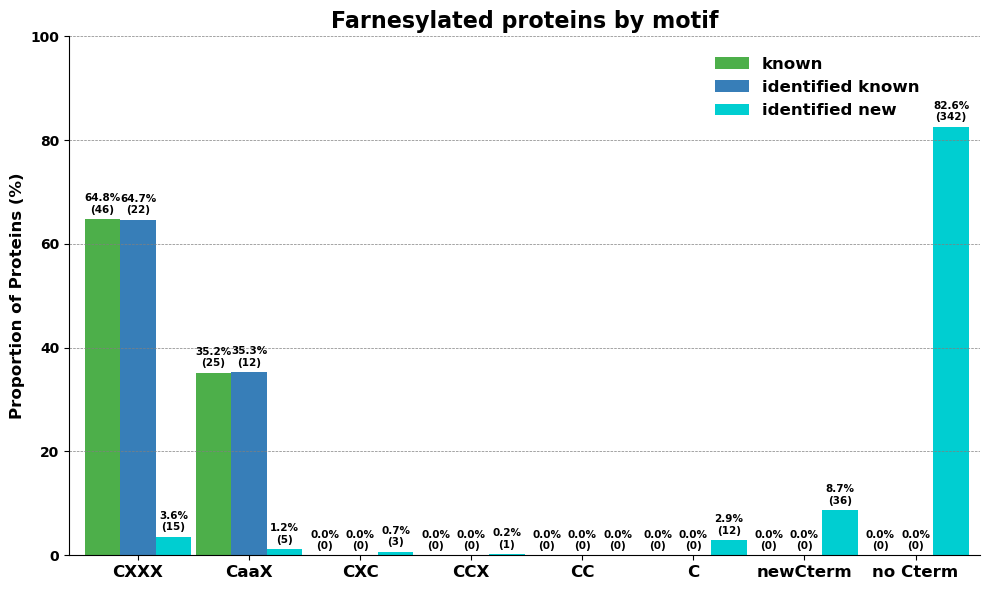

In [27]:
motifs = ("CXXX", "CaaX", "CXC", "CCX", "CC", "C", "newCterm", "no Cterm")

# Define group counts for known, identified known, and novel identified
group_counts = {
    'known': [46, 25, 0, 0, 0, 0, 0, 0],  
    'identified known': [22, 12, 0, 0, 0, 0, 0, 0],
    'identified new': [15, 5, 3, 1, 0, 12, 36, 342]
}

# Proportion calculation (assuming `F_found` and `F_GG_found` are defined)
group_proportions = group_counts.copy()
for attribute, measurement in group_proportions.items():
    if attribute == 'known':
        group_proportions[attribute] = [ round(x/sum(measurement)*100,1) for x in measurement ]
    if attribute == 'identified known':
        group_proportions[attribute] = [ round((x/len(canon_known_F))*100,1) for x in measurement ]
    if attribute == 'identified new':
        group_proportions[attribute] = [ round((x/len(novel_F))*100,1) for x in measurement ]  

# Update labels with counts and percentages
group_labels = group_counts.copy()
for attribute, measurement in group_labels.items():
    group_labels[attribute] = [ str(prop)+"%\n("+str(count)+")" for (prop, count) in zip(group_proportions[attribute],group_counts[attribute]) ]

# Call the updated plotting function
plot_grouped_bar_chart(motifs, group_proportions, group_labels, 'Farnesylated proteins by motif')

plt.tight_layout()
plt.savefig(os.path.join(figures, 'F_motifs.pdf'), bbox_inches='tight', dpi=300)

plt.show()

## Geranylgeranylated proteins

In [28]:
print('GG new C-term:', len(new_CTerm_GG), ', internal:', len(internal_GG))

GG new C-term: 8 , internal: 291


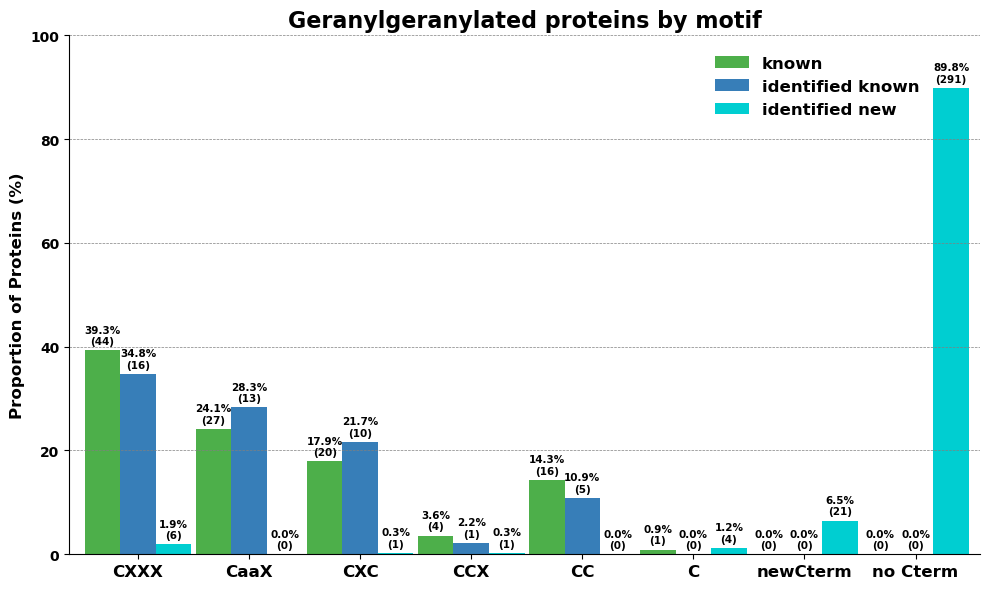

In [29]:
motifs = ("CXXX", "CaaX", "CXC", "CCX", "CC", "C", "newCterm", "no Cterm")

# Define group counts for known, identified known, and novel identified
group_counts = {
    'known': [44, 27, 20, 4, 16, 1, 0, 0],  
    'identified known': [16, 13, 10, 1, 5, 0, 0, 0],
    'identified new': [6, 0, 1, 1, 0, 4, 21, 291]
}

# Proportion calculation (assuming `F_found` and `F_GG_found` are defined)
group_proportions = group_counts.copy()
for attribute, measurement in group_proportions.items():
    if attribute == 'known':
        group_proportions[attribute] = [ round(x/sum(measurement)*100,1) for x in measurement ]
    if attribute == 'identified known':
        group_proportions[attribute] = [ round((x/len(canon_known_GG))*100,1) for x in measurement ]
    if attribute == 'identified new':
        group_proportions[attribute] = [ round((x/len(novel_GG))*100,1) for x in measurement ]  

# Update labels with counts and percentages
group_labels = group_counts.copy()
for attribute, measurement in group_labels.items():
    group_labels[attribute] = [ str(prop)+"%\n("+str(count)+")" for (prop, count) in zip(group_proportions[attribute],group_counts[attribute]) ]

# Call the updated plotting function
plot_grouped_bar_chart(motifs, group_proportions, group_labels, 'Geranylgeranylated proteins by motif')

# Save the figure
plt.savefig(os.path.join(figures, 'GG_motifs.pdf'), bbox_inches='tight')

# Show the plot
plt.show()

## All identified pernylated proteins

In [30]:
canon = pd.concat([canon_known_F, canon_known_GG, canon_novel_F, canon_novel_GG]).drop_duplicates().reset_index(drop=True)

new_CTerm = pd.concat([newCTerm_F, newCTerm_GG]).drop_duplicates().reset_index(drop=True)

internal= pd.concat([internal_F, internal_GG]).drop_duplicates().reset_index(drop=True)

In [31]:
# All prenylated, known and new

canon_motif_counts = canon['motif'].value_counts()
normalized_frequencies = (canon_motif_counts / len(all_found) * 100).round(1).astype(str) + '%'

motif_counts_table = pd.DataFrame({'count': canon_motif_counts, 'frequency': normalized_frequencies}).reset_index().rename(columns={'index': 'motif'})

new_canon = canon.groupby('motif')['name'].agg(set).reset_index()
new_canon['name'] = [list(elem) if len(elem) > 1 else list(elem)[0] for elem in new_canon['name']]

combined_df = pd.merge(motif_counts_table, new_canon, on='motif', how='inner')

print('All proteins with canonical motif of the', len(all_found), 'identified prenylated proteins:')
display(combined_df)


All proteins with canonical motif of the 636 identified prenylated proteins:


,motif,count,frequency,name
0,CXXX,54,8.5%,"[F219A, ZFN2B, DNJA2, CN37, NP1L1, CD38, NB5R3, ATD3B, STRAA, LRRF1, RAB8B, BROX, CEP85, RB40C, DPCD, DCAF8, RAB24, CENPF, NP1L4, TP4A1, PP16B, RB11A, MAPK3, DNJA4, GBP1, RHOB, GBG5, RHOC, APOL3, RAC2, RALA, GANAB, RHOH, RAP2A, PP2BB, WDTC1, SPDLY, GBP2, MAVS, CE85L, SSF1, LMNB2, MTOR, DNJA1, STK11, RAP1B, RHEB, QNG1, STX7, RAB21, TP4A2, ULK3, RALB, RAB18]"
1,CAAX,30,4.7%,"[RASH, LMNB1, CDC42, YKT6, PEX19, RASK, RRAS2, RASN, UBL3, RAC1, RAP2B, ZCCHV, GBG2, GBP5, RHOG, GNAI2, RAB28, EH1L1, I5P1, GBG10, INF2, FXL20, GBGT2, MIEN1, RAB8A, RHOA, KPBB, RAP2C, PRIC3, GBG8]"
2,CXC,13,2.0%,"[HARS1, RAB4B, ABCB7, RAB14, RB27A, RAB19, RAB7A, RAB6A, RAB3D, RAB43, RB33B, RB33A, COMD7]"
3,C,13,2.0%,"[TM87A, TCPB, MOT1, STX5, ARRB2, SC23B, GPSM3, MGST2, CAPZB, AT11B, HAUS6, RBGP1, SIAT1]"
4,CC,5,0.8%,"[RAB9A, RAB10, RAB1B, RAB2B, RAB2A]"
5,CCX,2,0.3%,"[RAB34, MGST3]"


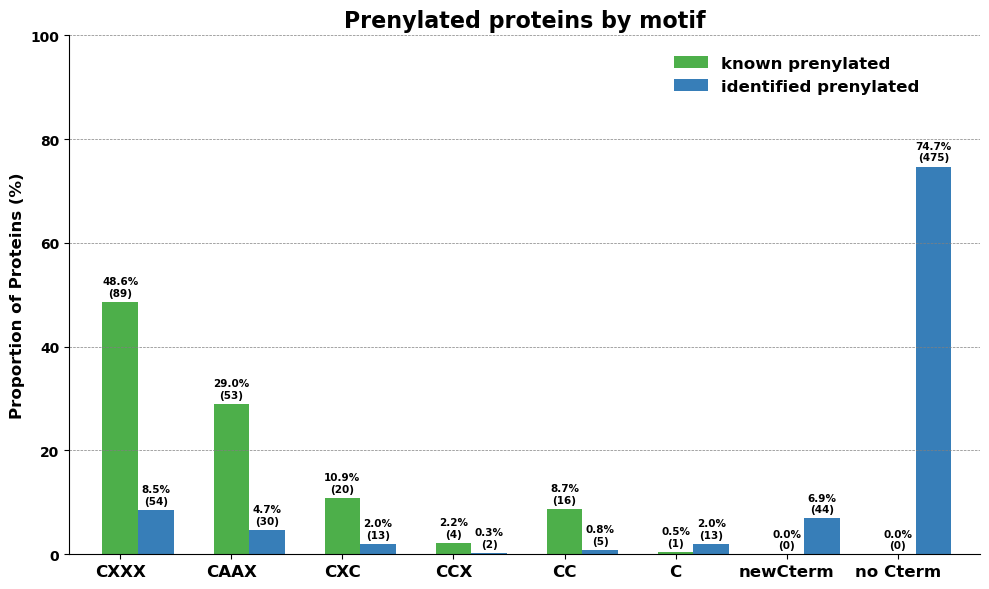

In [32]:
# All
motifs = ("CXXX", "CAAX", "CXC", "CCX", "CC", "C", "newCterm", "no Cterm")
group_counts = {
    'known prenylated': [89, 53, 20, 4, 16, 1, 0, 0],
    'identified prenylated': [54, 30, 13, 2, 5, 13, 44, 475],
    }

group_proportions = group_counts.copy()
for attribute, measurement in group_proportions.items():
    if attribute == 'known prenylated':
        group_proportions[attribute] = [ round(x/sum(measurement)*100,1) for x in measurement ]
    if attribute == 'identified prenylated':
        group_proportions[attribute] = [ round((x/ len(all_found) )*100,1) for x in measurement ]
        
group_labels = group_counts.copy()
for attribute, measurement in group_labels.items():
    group_labels[attribute] = [ str(prop)+"%\n("+str(count)+")" for (prop, count) in zip(group_proportions[attribute],group_counts[attribute]) ]

plot_grouped_bar_chart(motifs, group_proportions, group_labels, 'Prenylated proteins by motif')

plt.show()

# Sequence logos

## Canonical motif, known

In [33]:
fasta_canon_F_known = fasta[fasta['ID'].isin(canon_known_F['ID'])].drop_duplicates().reset_index(drop=True)
fasta_canon_GG_known = fasta[fasta['ID'].isin(canon_known_GG['ID'])].drop_duplicates().reset_index(drop=True)

In [34]:
# Save peptides for PSSMSearch

motif_counts = fasta_canon_F_known['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_canon_F_known['pep'][fasta_canon_F_known['motif'] == motif]
    filename = f'F_Cterm_known_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'known_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

22	CXXX	F_Cterm_known_CXXX.txt
12	CAAX	F_Cterm_known_CAAX.txt


In [35]:
# Save peptides for PSSMSearch

motif_counts = fasta_canon_GG_known['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_canon_GG_known['pep'][fasta_canon_GG_known['motif'] == motif]
    filename = f'GG_Cterm_known_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'known_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

16	CXXX	GG_Cterm_known_CXXX.txt
14	CAAX	GG_Cterm_known_CAAX.txt
10	CXC	GG_Cterm_known_CXC.txt
5	CC	GG_Cterm_known_CC.txt
1	CCX	GG_Cterm_known_CCX.txt


## Canonical motif, new

In [36]:
fasta_canon_F_new = fasta[fasta['ID'].isin(canon_novel_F['ID'])].drop_duplicates().reset_index(drop=True)
fasta_canon_GG_new = fasta[fasta['ID'].isin(canon_novel_GG['ID'])].drop_duplicates().reset_index(drop=True)

In [37]:
# Save peptides for PSSMSearch

motif_counts = fasta_canon_F_new['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_canon_F_new['pep'][fasta_canon_F_new['motif'] == motif]
    filename = f'F_Cterm_new_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'new_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

15	CXXX	F_Cterm_new_CXXX.txt
12	C	F_Cterm_new_C.txt
5	CAAX	F_Cterm_new_CAAX.txt
3	CXC	F_Cterm_new_CXC.txt
1	CCX	F_Cterm_new_CCX.txt


In [38]:
# Save peptides for PSSMSearch

motif_counts = fasta_canon_GG_new['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_canon_GG_new['pep'][fasta_canon_GG_new['motif'] == motif]
    filename = f'GG_Cterm_new_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'new_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

6	CXXX	GG_Cterm_new_CXXX.txt
4	C	GG_Cterm_new_C.txt
1	CXC	GG_Cterm_new_CXC.txt
1	CCX	GG_Cterm_new_CCX.txt


## Canonical motif, all

In [39]:
canon_F = pd.concat([fasta_canon_F_known, fasta_canon_F_new]).drop_duplicates().reset_index(drop=True)
canon_GG = pd.concat([fasta_canon_GG_known, fasta_canon_GG_new]).drop_duplicates().reset_index(drop=True)

In [40]:
fasta_canon_F = fasta[fasta['ID'].isin(canon_F['ID'])].drop_duplicates().reset_index(drop=True)
fasta_canon_GG = fasta[fasta['ID'].isin(canon_GG['ID'])].drop_duplicates().reset_index(drop=True)

In [41]:
# Save peptides for PSSMSearch

motif_counts = fasta_canon_F['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_canon_F['pep'][fasta_canon_F['motif'] == motif]
    filename = f'F_Cterm_all_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'all_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

37	CXXX	F_Cterm_all_CXXX.txt
17	CAAX	F_Cterm_all_CAAX.txt
12	C	F_Cterm_all_C.txt
3	CXC	F_Cterm_all_CXC.txt
1	CCX	F_Cterm_all_CCX.txt


In [42]:
# Save peptides for PSSMSearch

motif_counts = fasta_canon_GG['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_canon_GG['pep'][fasta_canon_GG['motif'] == motif]
    filename = f'GG_Cterm_all_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'all_canon', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

22	CXXX	GG_Cterm_all_CXXX.txt
14	CAAX	GG_Cterm_all_CAAX.txt
11	CXC	GG_Cterm_all_CXC.txt
5	CC	GG_Cterm_all_CC.txt
4	C	GG_Cterm_all_C.txt
2	CCX	GG_Cterm_all_CCX.txt


## New C-terminal motif

In [43]:
fasta_new_CTerm_F = fasta[fasta['ID'].isin(newCTerm_F['ID'])].reset_index(drop=True)
fasta_new_CTerm_GG = fasta[fasta['ID'].isin(newCTerm_GG['ID'])].reset_index(drop=True)

In [44]:
# Save peptides for PSSMSearch

motif_counts = fasta_new_CTerm_F['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_new_CTerm_F['pep'][fasta_new_CTerm_F['motif'] == motif]
    filename = f'F_new_CTerm_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'new_CTerm', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

15	CX	F_new_CTerm_CX.txt
13	CXX	F_new_CTerm_CXX.txt
7	CXXXX	F_new_CTerm_CXXXX.txt
1	CCC	F_new_CTerm_CCC.txt


In [45]:
# Save peptides for PSSMSearch

motif_counts = fasta_new_CTerm_GG['motif'].value_counts()

for motif, count in motif_counts.items():
    filtered_peps = fasta_new_CTerm_GG['pep'][fasta_new_CTerm_GG['motif'] == motif]
    filename = f'GG_new_CTerm_{motif}.txt'
    filtered_peps.to_csv(os.path.join(PSSMSearch, 'Cterm', 'new_CTerm', filename), header=None, index=None, sep=' ')
    print(f"{count}\t{motif}\t{filename}")

9	CXXXX	GG_new_CTerm_CXXXX.txt
8	CXX	GG_new_CTerm_CXX.txt
4	CX	GG_new_CTerm_CX.txt


# Comparison to motifs in entire human proteome

In [46]:
# proteins without cysteine in the human proteome, 26.09.23
# canonical sequences only

human_proteome = read_fastafile(os.path.join(datafolder, 'fasta_files', 'uniprotkb_human_AND_existence_1_AND_rev_2023_09_26.fasta'))

human_proteome_all = human_proteome.copy()

print(len(human_proteome))

25866


In [47]:
# Pipeline for detecting canonical motifs
# Updated with length checks

aliph_AA = ['A', 'G', 'V', 'I', 'L']

motifs = {
    "CAAX": lambda seq: len(seq) >= 4 and seq[-4] == 'C' and seq[-3] in aliph_AA and seq[-2] in aliph_AA,
    "CXXX": lambda seq: len(seq) >= 4 and seq[-4] == 'C',
    "CCC": lambda seq: seq.endswith('CCC'),
    "CXC": lambda seq: len(seq) >= 3 and seq[-3] == 'C' and seq[-1] == 'C',
    "CCX": lambda seq: len(seq) >= 3 and seq[-3] == 'C' and seq[-2] == 'C',
    "CC": lambda seq: len(seq) >= 2 and seq[-2] == 'C' and seq[-1] == 'C',
    "C": lambda seq: len(seq) >= 1 and seq[-1] == 'C'
}

In [48]:
print('All identified:', len(human_proteome), '\n')

# Iteratively filter for each motif
for motif_name, condition in motifs.items():
    motif_df = human_proteome[human_proteome['seq'].apply(condition)].reset_index(drop=True)

    # annotate motif in df
    motif_df['motif'] = f'{motif_name}'
    
    globals()[f'human_proteome_{motif_name}'] = motif_df # Create a new variable with the name based on the motif
    
    human_proteome = human_proteome[~human_proteome['ID'].isin(motif_df['ID'])]  # Remove identified sequences
    print(f'{motif_name}:  \t', len(motif_df), '\t(', len(human_proteome), ' remaining)', sep='')

# Recap
human_proteome_canon = pd.concat([human_proteome_CAAX, human_proteome_CXXX, human_proteome_CXC, human_proteome_CCX, human_proteome_CC, human_proteome_C], ignore_index=True)
print('\nIdentified proteins with canonical motifs: ', len(human_proteome_canon), '\t(', len(human_proteome), ' remaining)', sep='')
print('Check total:', len(human_proteome_canon) + len(human_proteome))

All identified: 25866 

CAAX:  	118	(25748 remaining)
CXXX:  	601	(25147 remaining)
CCC:  	11	(25136 remaining)
CXC:  	45	(25091 remaining)
CCX:  	41	(25050 remaining)
CC:  	67	(24983 remaining)
C:  	683	(24300 remaining)

Identified proteins with canonical motifs: 1555	(24300 remaining)
Check total: 25855


In [49]:
# Pipeline for detecting new C-terminal motifs
# Updated with length checks

motifs = {
    "CXXXX": lambda seq: len(seq) >= 5 and seq[-5] == 'C',
    "CXX": lambda seq: len(seq) >= 3 and seq[-3] == 'C',
    "CX": lambda seq: len(seq) >= 2 and seq[-2] == 'C'
}

In [50]:
print('Remaining proteins without canonical motif:', len(human_proteome), '\n')

# Iteratively filter for each motif
for motif_name, condition in motifs.items():
    motif_df = human_proteome[human_proteome['seq'].apply(condition)].reset_index(drop=True)

    # annotate motif in df
    motif_df['motif'] = f'{motif_name}'
    
    globals()[f'human_proteome_{motif_name}'] = motif_df # Create a new variable with the name based on the motif
    
    human_proteome = human_proteome[~human_proteome['ID'].isin(motif_df['ID'])]  # Remove identified sequences
    print(f'{motif_name}:  \t', len(motif_df), '\t(', len(human_proteome), ' remaining)', sep='')

# Recap
human_proteome_new_Cterm = pd.concat([human_proteome_CXXXX, human_proteome_CCC, human_proteome_CXX, human_proteome_CX], ignore_index=True)
print('\nIdentified proteins with new C-terminal motifs: ', len(human_proteome_new_Cterm), '\t(', 
      len(human_proteome), ' remaining)', sep='')
print('Check total:', len(human_proteome_canon) + len(human_proteome_new_Cterm) + len(human_proteome))

Remaining proteins without canonical motif: 24300 

CXXXX:  	555	(23745 remaining)
CXX:  	484	(23261 remaining)
CX:  	522	(22739 remaining)

Identified proteins with new C-terminal motifs: 1572	(22739 remaining)
Check total: 25866


In [51]:
# Recap

print('Out of ', len(human_proteome_all), ' proteins of the human proteome ', len(human_proteome_canon), ' have a canonical motif and ', 
      len(human_proteome_new_Cterm), ' have a new C-terminal motif.', sep='')

Out of 25866 proteins of the human proteome 1555 have a canonical motif and 1572 have a new C-terminal motif.
